# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head(), df.shape

197625


(    C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
 0  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/25/2018  00:00:00   
 1  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/25/2018  04:00:00   
 2  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/25/2018  08:00:00   
 3  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/25/2018  12:00:00   
 4  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/25/2018  16:00:00   
 
       DESC  ENTRIES  \
 0  REGULAR  6736067   
 1  REGULAR  6736087   
 2  REGULAR  6736105   
 3  REGULAR  6736180   
 4  REGULAR  6736349   
 
    EXITS                                                                 
 0                                            2283184                     
 1                                            2283188                     
 2                                            2283229                     
 3                                            2283314                     
 4                   

## Rename all the columns to lower case

In [6]:
#Your code here
df.columns = df.columns.str.lower()
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

## Change the Index to be the Line Names

In [7]:
#Your code here
df.set_index('linename', inplace = True)

df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Painstakingly change the index back

In [8]:
# Your code here
df.reset_index(inplace = True)

In [9]:
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order

In [10]:
# Your code here
df['Num_Lines'] = df.linename.map(lambda x: len(x))
df.sort_values(by = 'Num_Lines', inplace = True, axis = 0, ascending= False)
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
2686,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/29/2018,16:00:00,REGULAR,2836145,3311412,12
2673,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,16:00:00,REGULAR,2830710,3305818,12
2674,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,20:00:00,REGULAR,2832048,3306310,12
2675,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,00:00:00,REGULAR,2832325,3306433,12


## Write a function to clean a column name

In [11]:
def clean(col_name):
    cleaned = col_name.strip().lower()#Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [12]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [13]:
#Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [14]:
#Your code here
df.date = pd.to_datetime(df.date)

In [15]:
df.date = df.date.dt.day_name()

In [16]:
grouped = df.groupby('date').sum()

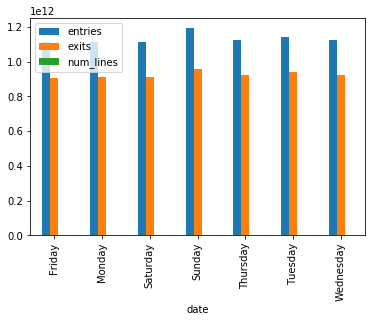

In [17]:
grouped.plot(kind = 'bar')

In [23]:
grouped.reset_index(inplace = True)

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes

In [24]:
#Your code here
grouped.date = grouped.date.map({'Monday':'weekday','Tuesday':'weekday', 'Wednesday': 'weekday',
                                'Thursday':'weekday', 'Friday':'weekday', 'Saturday':'weekend','Sunday':'weekend'})

In [25]:
grouped.head()

,date,entries,exits,num_lines
0,weekday,1110224700078,906799065337,75573
1,weekday,1114237052454,911938153513,76110
2,weekend,1115661545514,909142081474,74725
3,weekend,1192306179082,959223750461,75306
4,weekday,1122723988662,920691927110,76607


In [27]:
weekend = grouped.groupby('date').mean()

In [35]:
weekdays = weekend.iloc[0]
weekdays

entries      1.122831e+12
exits        9.204581e+11
num_lines    7.626120e+04
Name: weekday, dtype: float64

In [34]:
weekends = weekend.iloc[1]
weekends

entries      1.153984e+12
exits        9.341829e+11
num_lines    7.501550e+04
Name: weekend, dtype: float64

In [36]:
weekends - weekdays

entries      3.115301e+10
exits        1.372477e+10
num_lines   -1.245700e+03
dtype: float64

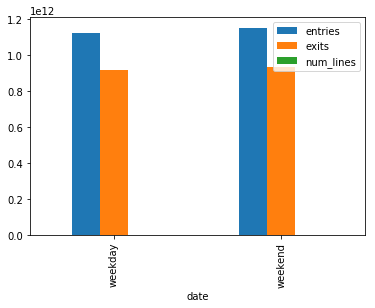

In [28]:
weekend.plot(kind='bar')

## Drop a couple of columns

In [113]:
# Your code here
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,Thursday,00:00:00,REGULAR,1417952,3267016,12
2686,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,Wednesday,16:00:00,REGULAR,2836145,3311412,12
2673,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,Monday,16:00:00,REGULAR,2830710,3305818,12
2674,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,Monday,20:00:00,REGULAR,2832048,3306310,12
2675,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,Tuesday,00:00:00,REGULAR,2832325,3306433,12


In [114]:
df.drop(columns=['c/a','unit','scp','desc'], inplace = True)
df.head()

,linename,station,division,date,time,entries,exits,num_lines
132292,1237ACENQRSW,TIMES SQ-42 ST,IRT,Thursday,00:00:00,1417952,3267016,12
2686,ACENQRS1237W,TIMES SQ-42 ST,BMT,Wednesday,16:00:00,2836145,3311412,12
2673,ACENQRS1237W,TIMES SQ-42 ST,BMT,Monday,16:00:00,2830710,3305818,12
2674,ACENQRS1237W,TIMES SQ-42 ST,BMT,Monday,20:00:00,2832048,3306310,12
2675,ACENQRS1237W,TIMES SQ-42 ST,BMT,Tuesday,00:00:00,2832325,3306433,12


## Summary

Great! You practiced your data cleanup-skills using Pandas.